**IMPORT MODULES**

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import math
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

**LOADING DATA**

In [4]:
# Set file path and convert csv file to pandas data frame
file_path = r'C:\Users\Sarvesh\Desktop\STAT 4355 Assignments\STAT 4355 Final Project\admission_data.csv'
grad_df = pd.read_csv(file_path)

**CLEANING DATA**

In [5]:
# Assign column names
grad_df.columns = ['GRE', 'TOEFL', 'UnivRtg', 'SOP', 'LOR', 'CGPA', 'Research', 'AdmitChance']
# Remove duplicates
grad_df = grad_df.drop_duplicates()
# Remove entries with missing values
grad_df = grad_df.dropna()
# Check variable data types
# grad_df.info()

# Subset data by university ratings
grad_df_ur_1 = grad_df[grad_df['UnivRtg'] == 1] # 34 observations
grad_df_ur_2 = grad_df[grad_df['UnivRtg'] == 2] # 126 observations
grad_df_ur_3 = grad_df[grad_df['UnivRtg'] == 3] # 162 observations
grad_df_ur_4 = grad_df[grad_df['UnivRtg'] == 4] # 105 observations
grad_df_ur_5 = grad_df[grad_df['UnivRtg'] == 5] # 73 observations

print(grad_df)

     GRE  TOEFL  UnivRtg  SOP  LOR  CGPA  Research  AdmitChance
0    337    118        4  4.5  4.5  9.65         1         0.92
1    324    107        4  4.0  4.5  8.87         1         0.76
2    316    104        3  3.0  3.5  8.00         1         0.72
3    322    110        3  3.5  2.5  8.67         1         0.80
4    314    103        2  2.0  3.0  8.21         0         0.65
..   ...    ...      ...  ...  ...   ...       ...          ...
495  332    108        5  4.5  4.0  9.02         1         0.87
496  337    117        5  5.0  5.0  9.87         1         0.96
497  330    120        5  4.5  5.0  9.56         1         0.93
498  312    103        4  4.0  5.0  8.43         0         0.73
499  327    113        4  4.5  4.5  9.04         0         0.84

[500 rows x 8 columns]


**EXPLORATORY DATA ANALYSIS**

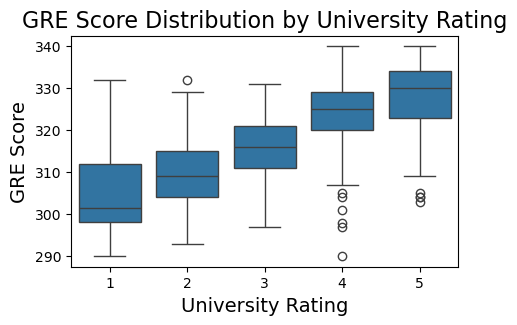

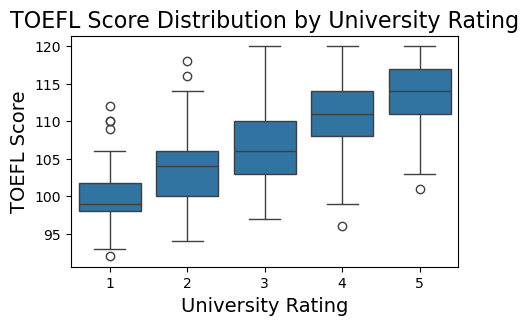

<Figure size 500x300 with 0 Axes>

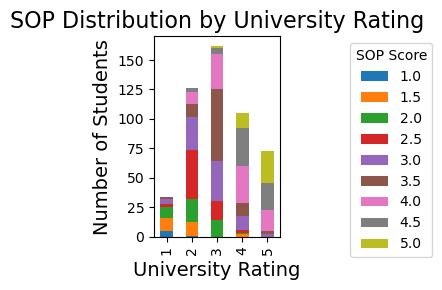

<Figure size 500x300 with 0 Axes>

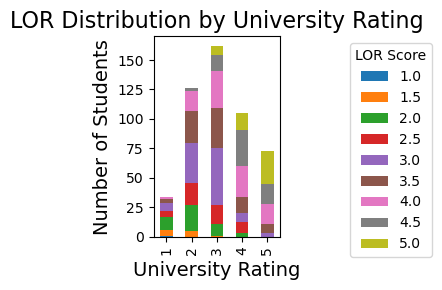

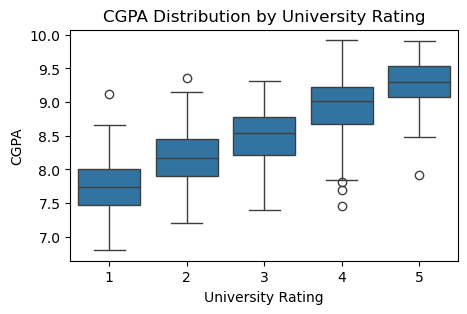

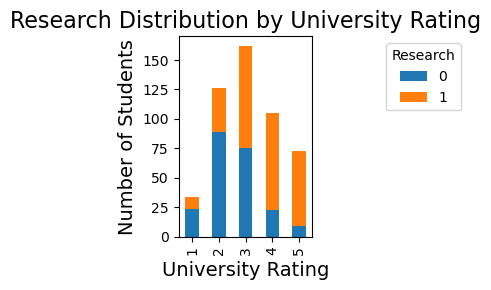

<Figure size 500x300 with 0 Axes>

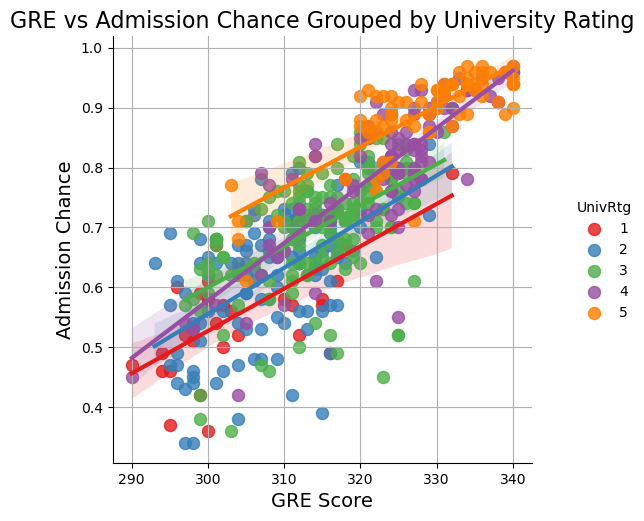

<Figure size 500x300 with 0 Axes>

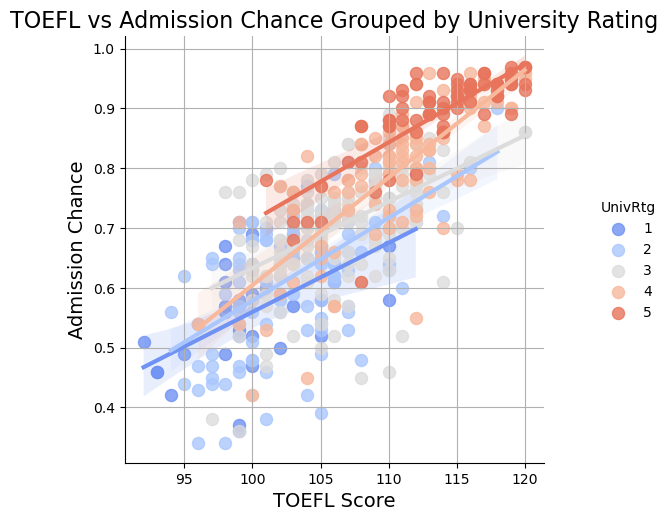

<Figure size 500x300 with 0 Axes>

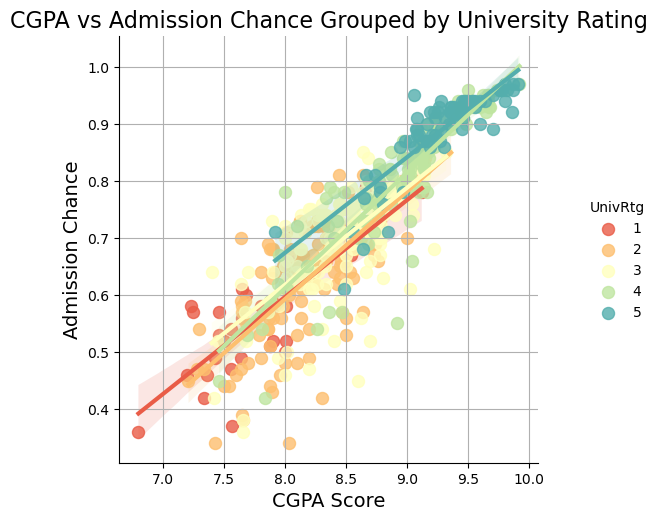

In [6]:
# Box Plot: University Rating vs GRE
plt.figure(figsize = (5, 3))
sns.boxplot(y = 'GRE', x = 'UnivRtg', data = grad_df)
plt.title('GRE Score Distribution by University Rating', fontsize = 16)
plt.xlabel('University Rating', fontsize = 14)
plt.ylabel('GRE Score', fontsize = 14)
plt.show()

# Box Plot: University Rating vs TOEFL
plt.figure(figsize = (5, 3))
sns.boxplot(y = 'TOEFL', x = 'UnivRtg', data = grad_df)
plt.title('TOEFL Score Distribution by University Rating', fontsize = 16)
plt.xlabel('University Rating', fontsize = 14)
plt.ylabel('TOEFL Score', fontsize = 14)
plt.show()

# Bar Plot: University Rating vs SOP 
plt.figure(figsize = (5, 3))
sop_counts = grad_df.groupby(['UnivRtg', 'SOP']).size().unstack()
sop_counts.plot(kind = 'bar', stacked = True, figsize = (5, 3))

plt.title('SOP Distribution by University Rating', fontsize = 16)
plt.xlabel('University Rating', fontsize = 14)
plt.ylabel('Number of Students', fontsize = 14)
plt.legend(title ='SOP Score', bbox_to_anchor =(1.5, 1), loc= 'upper left')
plt.tight_layout()
plt.show()

# Bar Plot: University Rating vs LOR
plt.figure(figsize = (5, 3))
lor_counts = grad_df.groupby(['UnivRtg', 'LOR'], observed = False).size().unstack()
lor_counts.plot(kind = 'bar', stacked = True, figsize = (5, 3))

plt.title('LOR Distribution by University Rating', fontsize = 16)
plt.xlabel('University Rating', fontsize = 14)
plt.ylabel('Number of Students', fontsize = 14)
plt.legend(title = 'LOR Score', bbox_to_anchor = (1.5, 1), loc = 'upper left')
plt.tight_layout()
plt.show()

# Box Plot: University Rating vs CGPA
plt.figure(figsize = (5, 3))
sns.boxplot(y = 'CGPA', x = 'UnivRtg', data = grad_df)
plt.title('CGPA Distribution by University Rating')
plt.xlabel('University Rating')
plt.ylabel('CGPA')
plt.show()

# Bar Plot: University Rating vs Research
res_counts = grad_df.groupby(['UnivRtg', 'Research'], observed = False).size().unstack()
res_counts.plot(kind = 'bar', stacked = True, figsize = (5, 3))

plt.title('Research Distribution by University Rating', fontsize = 16)
plt.xlabel('University Rating', fontsize = 14)
plt.ylabel('Number of Students', fontsize = 14)
plt.legend(title = 'Research', bbox_to_anchor = (1.5, 1), loc = 'upper left')
plt.tight_layout()
plt.show()

# Scatter Plot: GRE vs AdmitChance (grouped by University Rating)
grad_df['UnivRtg'] = grad_df['UnivRtg'].astype('category')

plt.figure(figsize = (5, 3))
sns.lmplot(data = grad_df, x = 'GRE', y = 'AdmitChance', hue = 'UnivRtg', scatter_kws = {'s':75}, palette = 'Set1', 
          line_kws = {'linewidth' : 3})
plt.title('GRE vs Admission Chance Grouped by University Rating', fontsize = 16)
plt.xlabel('GRE Score', fontsize = 14)
plt.ylabel('Admission Chance', fontsize = 14)
plt.grid(True)
plt.show()

# Scatter Plot: TOEFL vs AdmitChance (grouped by University Rating)
plt.figure(figsize = (5, 3))
sns.lmplot(data = grad_df, x = 'TOEFL', y = 'AdmitChance', hue = 'UnivRtg', scatter_kws = {'s':75}, palette = 'coolwarm', 
          line_kws = {'linewidth' : 3})
plt.title('TOEFL vs Admission Chance Grouped by University Rating', fontsize = 16)
plt.xlabel('TOEFL Score', fontsize = 14)
plt.ylabel('Admission Chance', fontsize = 14)
plt.grid(True)
plt.show()

# Scatter Plot: CGPA vs AdmitChance (grouped by University Rating)
plt.figure(figsize = (5, 3))
sns.lmplot(data = grad_df, x = 'CGPA', y = 'AdmitChance', hue = 'UnivRtg', scatter_kws = {'s':75}, palette = 'Spectral', 
          line_kws = {'linewidth' : 3})
plt.title('CGPA vs Admission Chance Grouped by University Rating', fontsize = 16)
plt.xlabel('CGPA Score', fontsize = 14)
plt.ylabel('Admission Chance', fontsize = 14)
plt.grid(True)
plt.show()

**CORRELATION ANALYSIS**

**MODEL BUILDING**

***UNIVERSITY RATING: 5 (MULTIPLE REGRESSION MODEL)***

C:\Users\Sarvesh\anaconda3\envs\GradPred\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=14 observations were given.
  return hypotest_fun_in(*args, **kwds)


                            OLS Regression Results                            
Dep. Variable:            AdmitChance   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     22.44
Date:                Mon, 18 Nov 2024   Prob (F-statistic):           0.000307
Time:                        14:54:38   Log-Likelihood:                 35.288
No. Observations:                  14   AIC:                            -56.58
Df Residuals:                       7   BIC:                            -52.10
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8679      0.007    118.005      0.0

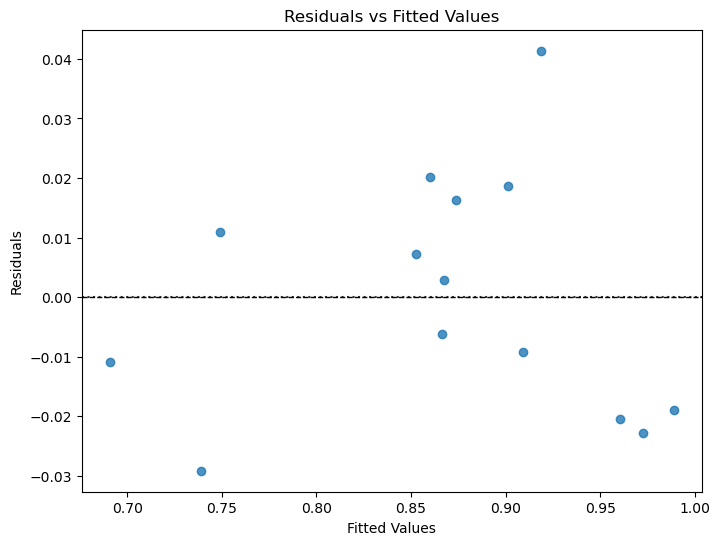

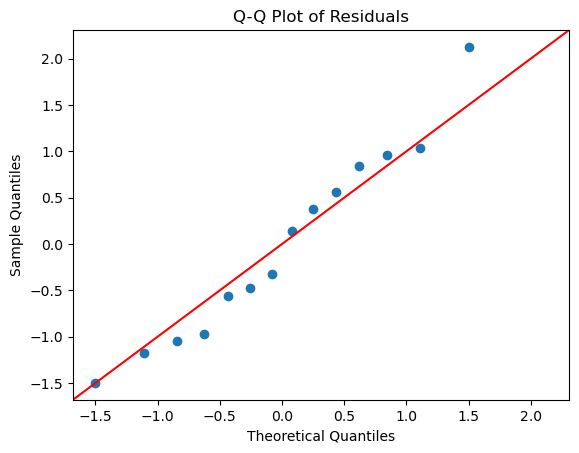

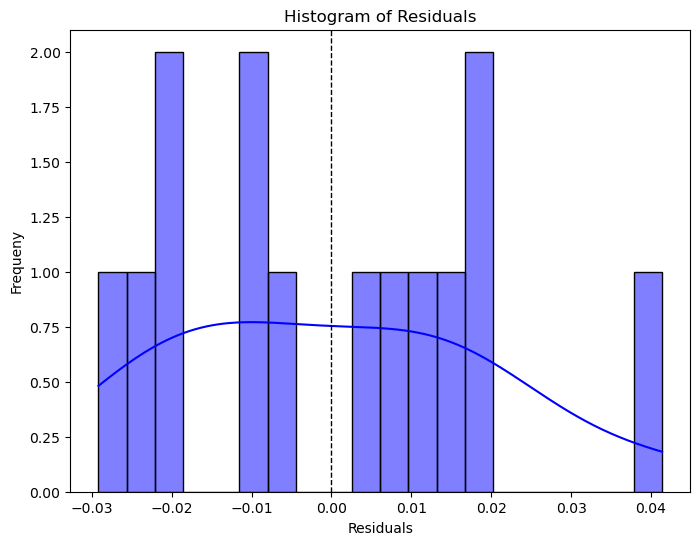

    Feature          VIF
0     const  2150.346237
1       GRE     3.506071
2     TOEFL     3.225959
3       SOP     1.161780
4       LOR     1.426846
5      CGPA     3.212406
6  Research     1.727773
Mean Squared Error: 0.0012049117330419081
R-sqd : 0.7528258740810371
RMSE : 0.034711838514286567
    Actual  Predicted
0     0.94   0.939876
1     0.88   0.850895
2     0.92   0.857417
3     0.93   0.946607
4     0.97   0.963753
5     0.92   0.911094
6     0.87   0.805262
7     0.81   0.778431
8     0.87   0.822588
9     0.93   0.907469
10    0.78   0.707001
11    0.91   0.878748
12    0.87   0.839650
13    0.87   0.848183
14    0.91   0.889599
15    0.92   0.879679
16    0.94   0.925245
17    0.94   0.911272
18    0.92   0.928321
19    0.81   0.751029
20    0.78   0.767055
21    0.91   0.897028
22    0.94   0.941640
23    0.71   0.634150
24    0.96   0.965536
25    0.94   0.954430
26    0.96   0.925214
27    0.77   0.700788
28    0.94   0.939045
29    0.71   0.664581
30    0.93   0.887142

In [10]:
# Set up the predictors and the target variable
x_ur_5 = grad_df_ur_5[['GRE', 'TOEFL', 'SOP', 'LOR',  'CGPA',  'Research']]
y_ur_5 = grad_df_ur_5['AdmitChance']

# Partition the data into testing and training sets (80% train, 20% test)
x_train_ur_5, x_test_ur_5, y_train_ur_5, y_test_ur_5 = train_test_split(x_ur_5, y_ur_5, test_size = 0.8, random_state = 50)

scaler = StandardScaler()
x_train_ur_5 = scaler.fit_transform(x_train_ur_5)
x_test_ur_5 = scaler.transform(x_test_ur_5)

# Add intercepts to the training and testing set for the predictors
x_train_ur_5 = sm.add_constant(x_train_ur_5)
x_test_ur_5 = sm.add_constant(x_test_ur_5)

# Build mltiple regression model and print summary statistics
model_ur_5 = sm.OLS(y_train_ur_5, x_train_ur_5).fit()
print(model_ur_5.summary())

# Build residual plot (residuals vs fitted values)
residuals = model_ur_5.resid
fitted = model_ur_5.fittedvalues

plt.figure(figsize=(8, 6))
sns.residplot(x=fitted, y=residuals, line_kws={'color': 'red', 'lw': 2})
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

# Build Q-Q Plot
sm.qqplot(residuals, line = '45', fit = True)
plt.title('Q-Q Plot of Residuals')
plt.show()

# Build Histogram of Residuals
plt.figure(figsize = (8, 6))
sns.histplot(residuals, kde = True, bins = 20, color = 'blue')
plt.axvline(0, color = 'black', linestyle = '--', linewidth = 1)
plt.xlabel('Residuals')
plt.ylabel('Frequeny')
plt.title('Histogram of Residuals')
plt.show()

# Find the VIFs to assess multicollinearity in the dataset
x_ur_5 = grad_df_ur_5[['GRE', 'TOEFL', 'SOP', 'LOR', 'CGPA', 'Research']]
x_ur_5_with_const = sm.add_constant(x_ur_5)

vif_data_ur_5 = pd.DataFrame()
vif_data_ur_5['Feature'] = x_ur_5_with_const.columns
vif_data_ur_5['VIF'] = [variance_inflation_factor(x_ur_5_with_const.values, i) for i in range(x_ur_5_with_const.shape[1])]
print(vif_data_ur_5)

# Use the trained multiple regression model to predict admission chances
y_pred_ur_5 = model_ur_5.predict(x_test_ur_5)

# Calculate MSE and R^2 metrics
mse = mean_squared_error(y_test_ur_5, y_pred_ur_5)
rmse = math.sqrt(mse)
r2 = r2_score(y_test_ur_5, y_pred_ur_5)
print(f"Mean Squared Error: {mse}")
print(f"R-sqd : {r2}")
print(f"RMSE : {rmse}")

# Display data frame to show the actual admission chances and predicted 
#  admission chances from the testing set
act_vs_pred = pd.DataFrame({
    'Actual': y_test_ur_5.values,  # Ensure we use values, not the index
    'Predicted': y_pred_ur_5
})

print(act_vs_pred)

***UNIVERSITY RATING: 5 (XGBoost Model)***

In [22]:
# Initializing XGBoost Model
xgb_model = xgb.XGBRegressor(
    objective = 'reg:squarederror', 
    n_estimators = 50, 
    learning_rate = 0.1, 
    max_depth = 3, 
    subsample = 0.8, 
    colsample_bytree = 0.8, 
    random_state = 50
)

# Training XGBoost Model
xgb_model.fit(x_train_ur_5, y_train_ur_5)
# Making Predictions with XGBoost Model
xgb_y_pred_ur_5 = xgb_model.predict(x_test_ur_5)

# Calculate MSE and R^2 metrics
mse = mean_squared_error(y_test_ur_5, xgb_y_pred_ur_5)
rmse = math.sqrt(mse)
r2 = r2_score(y_test_ur_5, xgb_y_pred_ur_5)
print(f"Mean Squared Error: {mse}")
print(f"R-sqd : {r2}")
print(f"RMSE : {rmse}")

# Create data frame to compare actual and predicted values
xgb_act_vs_pred = pd.DataFrame({
    "Actual" : y_test_ur_5, 
    "XGB_Pred" : xgb_y_pred_ur_5
})

# Display data frame to compare actual and predicted values
print(xgb_act_vs_pred)

# Hyperparameter Tuning
param_grid = {
    'n_estimators': [50, 100], 
    'max_depth' : [3, 5], 
    'learning_rate' : [0.01, 0.1], 
    'subsample' : [0.5, 1.0], 
    'colsample_bytree' : [0.5, 1.0]
}

grid_search = GridSearchCV(
    estimator = xgb.XGBRegressor(objective = 'reg:squarederror', random_state = 50), 
    param_grid = param_grid, 
    scoring = 'neg_mean_squared_error', 
    cv = 5, 
    verbose = 1
)

grid_search.fit(x_train_ur_5, y_train_ur_5)
print(f"Best Paramaters: {grid_search.best_params_}")

best_xgb_model = grid_search.best_estimator_

xgb_hyp_pred_ur_5 = best_xgb_model.predict(x_test_ur_5)
xgb_hyp_act_vs_pred = pd.DataFrame({
    'Actual' : y_test_ur_5, 
    'XGB_HYP_PRED' : xgb_hyp_pred_ur_5
})

print(xgb_hyp_act_vs_pred)

Mean Squared Error: 0.002582343168788959
R-sqd : 0.4702612663943446
RMSE : 0.05081676070735874
     Actual  XGB_Pred
423    0.94  0.929388
35     0.88  0.795468
82     0.92  0.800708
497    0.93  0.925627
203    0.97  0.957528
286    0.92  0.892380
191    0.87  0.762994
338    0.81  0.713171
495    0.87  0.721955
188    0.93  0.892657
467    0.78  0.698132
424    0.91  0.911311
470    0.87  0.802320
260    0.87  0.756390
44     0.91  0.875358
83     0.92  0.884562
22     0.94  0.921151
84     0.94  0.931550
129    0.92  0.883484
339    0.81  0.712094
165    0.78  0.766614
234    0.91  0.875843
120    0.94  0.927861
483    0.71  0.699311
385    0.96  0.952466
70     0.94  0.927635
71     0.96  0.951389
131    0.77  0.703038
121    0.94  0.933285
132    0.71  0.701859
285    0.93  0.891982
34     0.94  0.951400
215    0.93  0.886765
187    0.93  0.917235
496    0.96  0.952466
190    0.90  0.874142
362    0.91  0.880515
189    0.88  0.862391
133    0.79  0.830323
287    0.89  0.872843
45 